# Visualizing VOODOO predictions


In [1]:
import xarray as xr
import numpy as np
import datetime
from operator import itemgetter
from itertools import product
from scipy.ndimage import gaussian_filter
import logging
logger = logging.getLogger('libVoodoo')
logger.setLevel(logging.CRITICAL)

import sys
sys.path.append('/Users/willi/code/python/larda3/larda/')

import pyLARDA.Transformations as lardaTR
import Utils as utl

from meteoSI import mod_ad

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import axes3d
import matplotlib.ticker as ticker
from PlottingUtility import *
import Colormaps

_FIG_SIZE = (14, 4.7)

font_settings = {
    'range_interval': [0, 6000],
    'fig_size': [15, 10],
    'rg_converter': True,
    'font_size': 15,
    'font_weight': 'normal',
    'zlabel': '',
}


# trained on >100 epochs of 60/600 (20181127-20190927)
#voodoo_nc = '20190801-20190801-20201017-174440__20201017-174440_weights.h5.nc'
voodoo_nc = '20190313-20190313-20201017-174440__20201017-174440_weights.h5.nc'
#voodoo_nc = '20190223-20190223-20201017-174440__20201017-174440_weights.h5.nc'

# trained on 3 epochs of 60/300 (20181127-20190928)
#voodoo_nc = '20190801-20190801-20201022-171411_weights.h5.nc'
#voodoo_nc = '20190313-20190313-20201022-171411_weights.h5.nc'
#voodoo_nc = '20190223-20190223-20201022-171411_weights.h5.nc'
#voodoo_nc = '20190801-20190801-20201023-180937_weights.h5.nc'
#voodoo_nc = '20190801-20190801-20201025-135300_weights.h5.nc'

case = voodoo_nc[:8]
YYYY, MM, DD = int(case[:4]), int(case[4:6]), int(case[6:8]) 

In [2]:
def _plot_classificaiton(xr_ds, var, title='', save=True, **font_settings):
    fig, ax = plt.subplots(1, figsize=(17, 5))
    fig, ax = lardaTR.plot_timeheight(voodoo_xr[var], title=title, ax=ax, **font_settings)
    ax.grid(which='both')
    plt.tight_layout()
    if save:  fig.savefig(f'plots/{case}-{var}_classification.png', dpi=450)
    return fig, ax


# Open the VOODOO prediction NetCDF file

```
Reading zarr /home/sdig/code/larda3/voodoo//data//xarray_zarr/20181127-20190927-X.zarr, elapsed time = 0:00:11 [min:sec]

samples per class
          881425   total
           0   Clear sky
       50103   Cloud liquid droplets only
      221044   Drizzle or rain.
        2326   Drizzle/rain & cloud droplet
      452143   Ice particles.
      117855   Ice coexisting with supercooled liquid droplets.
           0   Melting ice particles
           0   Melting ice & cloud droplets
           0   Aerosol
         647   Insects
       37307   Aerosol and Insects

samples per class after removing 1 in 5 values for the validation split
      705140   total
           0   Clear sky
       40047   Cloud liquid droplets only
      176785   Drizzle or rain.
        1847   Drizzle/rain & cloud droplet
      361811   Ice particles.
       94268   Ice coexisting with supercooled liquid droplets.
           0   Melting ice particles
           0   Melting ice & cloud droplets
       30382   Aerosol
           0   Insects
           0   Aerosol and Insects
           
           
Created model /home/sdig/code/larda3/voodoo//models//20201017-174440__20201017-174440_weights.h5
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
input_1 (InputLayer)         [(None, 256, 6, 1)]       0
_________________________________________________________________
Conv2D-layer-0 (Conv2D)      (None, 256, 6, 512)       2048
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 6, 512)       2048
_________________________________________________________________
dropout (Dropout)            (None, 256, 6, 512)       0
_________________________________________________________________
activation (Activation)      (None, 256, 6, 512)       0
_________________________________________________________________
average_pooling2d (AveragePo (None, 128, 6, 512)       0
_________________________________________________________________
Conv2D-layer-1 (Conv2D)      (None, 128, 6, 256)       131328
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 6, 256)       1024
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 6, 256)       0
_________________________________________________________________
activation_1 (Activation)    (None, 128, 6, 256)       0
_________________________________________________________________
average_pooling2d_1 (Average (None, 128, 6, 256)       0
_________________________________________________________________
Conv2D-layer-2 (Conv2D)      (None, 128, 6, 1024)      787456
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 6, 1024)      4096
_________________________________________________________________
dropout_2 (Dropout)          (None, 128, 6, 1024)      0
_________________________________________________________________
activation_2 (Activation)    (None, 128, 6, 1024)      0
_________________________________________________________________
average_pooling2d_2 (Average (None, 64, 6, 1024)       0
_________________________________________________________________
Conv2D-layer-3 (Conv2D)      (None, 64, 6, 512)        524800
_________________________________________________________________
batch_normalization_3 (Batch (None, 64, 6, 512)        2048
_________________________________________________________________
dropout_3 (Dropout)          (None, 64, 6, 512)        0
_________________________________________________________________
activation_3 (Activation)    (None, 64, 6, 512)        0
_________________________________________________________________
average_pooling2d_3 (Average (None, 64, 6, 512)        0           
_________________________________________________________________
Conv2D-layer-4 (Conv2D)      (None, 64, 6, 1024)       1573888
_________________________________________________________________
batch_normalization_4 (Batch (None, 64, 6, 1024)       4096
_________________________________________________________________
dropout_4 (Dropout)          (None, 64, 6, 1024)       0
_________________________________________________________________
activation_4 (Activation)    (None, 64, 6, 1024)       0
_________________________________________________________________
average_pooling2d_4 (Average (None, 16, 3, 1024)       0
_________________________________________________________________
Conv2D-layer-5 (Conv2D)      (None, 16, 3, 512)        524800
_________________________________________________________________
batch_normalization_5 (Batch (None, 16, 3, 512)        2048
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 3, 512)        0
_________________________________________________________________
activation_5 (Activation)    (None, 16, 3, 512)        0
_________________________________________________________________
average_pooling2d_5 (Average (None, 4, 3, 512)         0
_________________________________________________________________
flatten (Flatten)            (None, 6144)              0
_________________________________________________________________
dense-layer-0 (Dense)        (None, 512)               3146240
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0
_________________________________________________________________
activation_6 (Activation)    (None, 512)               0
_________________________________________________________________
dense-layer-1 (Dense)        (None, 512)               262656
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0
_________________________________________________________________
activation_7 (Activation)    (None, 512)               0
_________________________________________________________________
dense-layer-2 (Dense)        (None, 256)               131328
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0
_________________________________________________________________
activation_8 (Activation)    (None, 256)               0
_________________________________________________________________
dense-layer-3 (Dense)        (None, 128)               32896
_________________________________________________________________
batch_normalization_9 (Batch (None, 128)               512
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0
_________________________________________________________________
activation_9 (Activation)    (None, 128)               0
_________________________________________________________________
prediction (Dense)           (None, 9)                 1161
=================================================================
Total params: 7,139,593
Trainable params: 7,129,097
Non-trainable params: 10,496           

Training: 100%|█████████████████████████████████████████████████████████ 100/100 ETA: 00:00s,  1213.18s/epochs
Saved model to disk :: /home/sdig/code/larda3/voodoo//models//20201017-174440__20201017-174440_weights.h5

        *****Done*****, elapsed time = 1 day, 9:42:22 [min:sec]
```

In [3]:

## importing pyplot and image from matplotlib 
#import matplotlib.pyplot as plt 
#import matplotlib.image as img 
#  
## reading png image file 
#im = img.imread('plots/histo_loss-acc_20201018-141003__20201017-174440__20201017-174440_weights.png') 

#plt.rcParams["figure.figsize"] = (15,10)
#plt.axis('off')
#plt.imshow(im, aspect='auto') 

In [4]:
## reading png image file 
#im = img.imread('plots/histo_loss-acc_20201022-203212__20201022-171411_weights.png') 

#plt.rcParams["figure.figsize"] = (15,10)
#plt.axis('off')
#plt.imshow(im, aspect='auto') 

In [5]:
voodoo_xr = xr.open_mfdataset(f'data/{voodoo_nc}')

# convert to datetime
dt_list = [datetime.datetime.fromtimestamp(ts) for ts in voodoo_xr.ts.values]
print(voodoo_xr)
font_settings.update({'mask': voodoo_xr.mask.copy()})

voodoo_xr.voodoo_classification.values[voodoo_xr.voodoo_classification.values==8] = 10
voodoo_xr['voodoo_class_raw_nosmoothing'] = voodoo_xr.voodoo_classification.copy()

<xarray.Dataset>
Dimensions:                                       (cl: 9, dt: 2882, nchannels: 6, nsamples: 188320, nvelocity: 256, rg: 292, ts: 2882)
Coordinates:
  * ts                                            (ts) float64 1.552e+09 ... 1.553e+09
  * dt                                            (dt) datetime64[ns] 2019-03-13T00:00:15.000001 ... 2019-03-14T00:00:15.000001
  * rg                                            (rg) float64 119.2 ... 1.196e+04
  * nsamples                                      (nsamples) int64 0 ... 188319
  * nvelocity                                     (nvelocity) int64 0 1 ... 255
  * nchannels                                     (nchannels) int64 0 1 2 3 4 5
  * cl                                            (cl) int64 0 1 2 3 4 5 6 7 8
Data variables:
    features                                      (nsamples, nvelocity, nchannels) float32 dask.array<shape=(188320, 256, 6), chunksize=(188320, 256, 6)>
    targets                                     

# load contour data

In [6]:
T = voodoo_xr.temperature.copy()
p = voodoo_xr.pressure.copy()
T['var_unit'] = "C"
p['var_unit'] = 'hPa'
q = voodoo_xr.q.copy()

def spechum2relhum(q, T, P):
    Ttmp = T + 273.15
    T0 = 273.16  # Kelvin
    return 0.263 * P * q / np.exp(17.67 * (Ttmp - T0) / (Ttmp - 29.65))


T = T -  273.15
p = p / 100.0
q.values = spechum2relhum(q.values, T.values, p.values) * 100.0

contour_T = {'data': T, 'levels': np.arange(-40, 16, 5)}
contour_p = {'data': p, 'levels': np.arange(500, 1000, 50)}
contour_q = {'data': q, 'levels': np.arange(70, 105, 5)}


# radar & lidar quickook, Cloudnetpy classification

In [7]:
# Add Radar and Lidar meta information
voodoo_xr.Z.attrs.update({'rg_unit': 'm', 'var_unit': 'dBZ', 'system': 'limrad94'})
voodoo_xr.VEL.attrs.update({'rg_unit': 'm', 'var_unit': 'm s-1', 'system': 'limrad94'})
voodoo_xr.VEL_sigma.attrs.update({'rg_unit': 'm', 'var_unit': 'm s-1', 'system': 'limrad94'})
voodoo_xr.width.attrs.update({'rg_unit': 'm', 'var_unit': 'm s-1', 'system': 'limrad94'})
voodoo_xr.beta.attrs.update({'rg_unit': 'm', 'var_unit': 'm-1 sr-1', 'system': 'ceilometer'})
voodoo_xr.attbsc532.attrs.update({'rg_unit': 'm', 'var_unit': 'm-1 sr-1', 'system': 'pollyxt'})
voodoo_xr.depol.attrs.update({'rg_unit': 'm', 'var_unit': '%', 'system': 'pollyxt'})


/Users/willi/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:524: RuntimeWarning: overflow encountered in multiply
  xa *= self.N
/Users/willi/code/python/larda3/larda/pyLARDA/Transformations.py:715: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout()


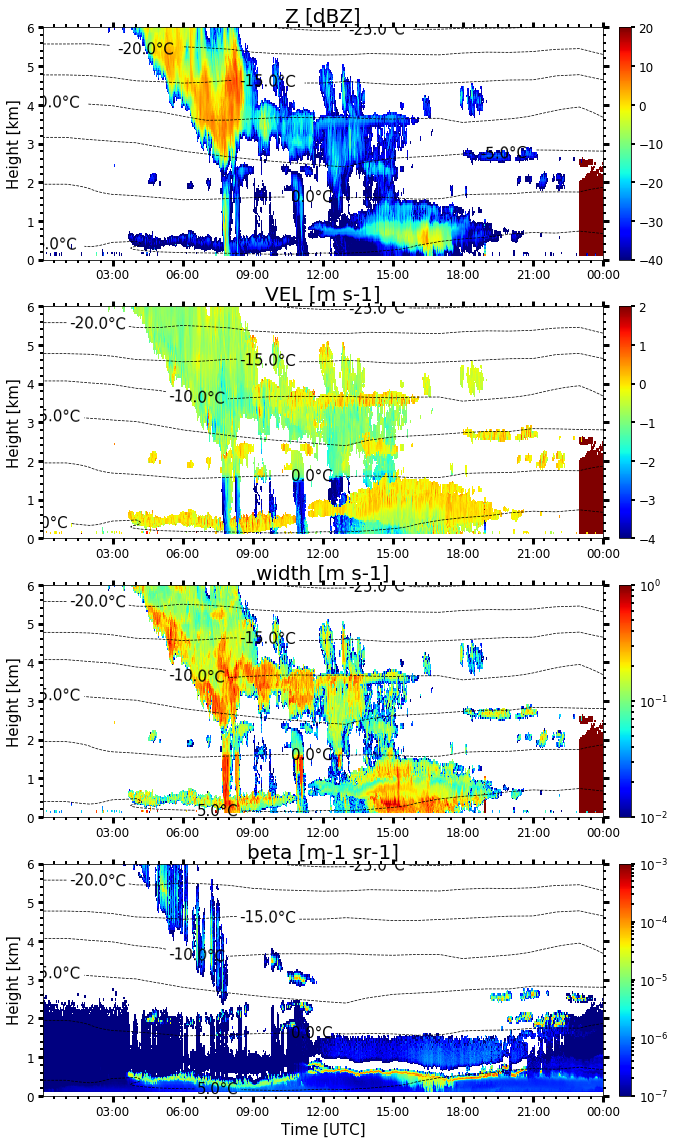

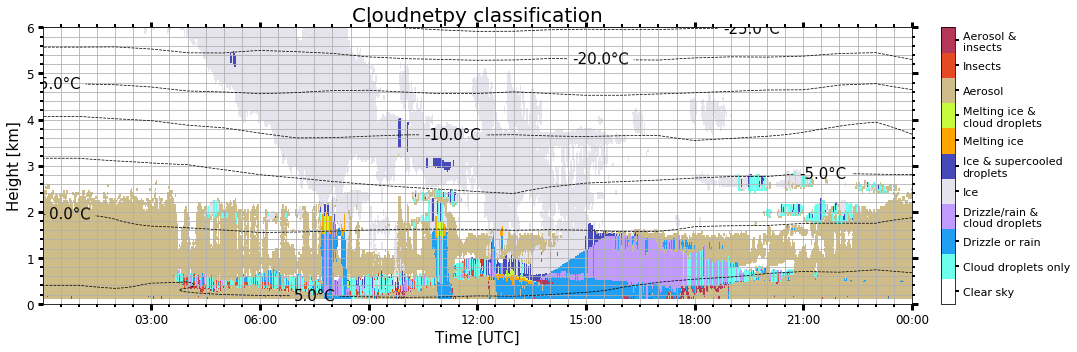

In [8]:
fig_p, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 16))
font_settings.update({'fig': fig_p, 'colormap': 'jet', 'contour': contour_T, 'mask': voodoo_xr.mask_nc.values})

if 'zlim' in font_settings.keys(): font_settings.pop('zlim')

fig_p, ax[0] = lardaTR.plot_timeheight(voodoo_xr.Z,         title=f'Z [{voodoo_xr.Z.var_unit}]',                 ax=ax[0], zlim=[-40, 20], **font_settings)
fig_p, ax[1] = lardaTR.plot_timeheight(voodoo_xr.VEL,       title=f'VEL [{voodoo_xr.VEL.var_unit}]',             ax=ax[1], zlim=[-4, 2],   **font_settings)
#fig_p, ax[2] = lardaTR.plot_timeheight(voodoo_xr.VEL_sigma, title=f'VEL_sigma [{voodoo_xr.VEL_sigma.var_unit}]', ax=ax[2], zlim=[1.e-2, 1],     z_converter='log', **font_settings)
fig_p, ax[2] = lardaTR.plot_timeheight(voodoo_xr.width,     title=f'width [{voodoo_xr.width.var_unit}]',         ax=ax[2], zlim=[1.e-2, 1],     z_converter='log', **font_settings)
fig_p, ax[3] = lardaTR.plot_timeheight(voodoo_xr.beta,      title=f'beta [{voodoo_xr.beta.var_unit}]',           ax=ax[3], zlim=[1.e-7, 1.e-3], z_converter='log', **font_settings)
#fig_p, ax[5] = lardaTR.plot_timeheight(voodoo_xr.attbsc532, title=f'attbsc532 [{voodoo_xr.attbsc532.var_unit}]', ax=ax[5], zlim=[1.e-7, 1.e-3], z_converter='log', **font_settings)
#fig_p, ax[6] = lardaTR.plot_timeheight(voodoo_xr.depol,     title=f'depol [{voodoo_xr.depol.var_unit}]',         ax=ax[6], zlim=[0, 0.2], **font_settings)

for i in range(3): ax[i].set_xlabel('')

font_settings.update({'colormap': 'cloudnet_target_new', 'contour': contour_T, 'mask': voodoo_xr.mask_nc.values})
#fig_p, ax[5] = lardaTR.plot_timeheight(voodoo_xr.target_classification, 
#                                       title=f'Target Classificaiton',           
#                                       ax=ax[5], zlim=[0, 10], **font_settings)
        
plt.subplots_adjust(hspace=0.2)
fig_p.savefig(f'plots/{case}-VOODOO_radar_lidar.png', dpi=450)


_, _ = _plot_classificaiton(voodoo_xr, 'target_classification', title='Cloudnetpy classification', **font_settings)

# Predicted Probabilitys Distribution

pixel above melting layer in deep convetive systems: survivorship bias --> https://www.youtube.com/watch?v=P9WFpVsRtQg&feature=emb_logo

In [9]:

# look at important classes "ice", "ice and supercooled droplets", "cloud droplets only", and "drizzle/rain"
P_ice = voodoo_xr['voodoo_classification_probabilities'][:, :, 4].copy()
P_mixed = voodoo_xr['voodoo_classification_probabilities'][:, :, 5].copy()
P_droplets = voodoo_xr['voodoo_classification_probabilities'][:, :, 1].copy()
P_precip = voodoo_xr['voodoo_classification_probabilities'][:, :, 2].copy()

# sum of probabilities of left over classes
P_others = voodoo_xr['voodoo_classification_probabilities'][:, :, 2].copy()
P_others.values = 1 - (P_precip.values + P_ice.values + P_mixed.values + P_droplets.values)
P_others_raw = P_others.copy()

# all classes containing cloud droplets
P_allCD = voodoo_xr['voodoo_classification_probabilities'][:, :, 2].copy()
P_allCD.values = P_mixed.values + P_droplets.values

# warm and cold precipitation
P_allPR = voodoo_xr['voodoo_classification_probabilities'][:, :, 2].copy()
P_allPR.values = P_precip.values + P_ice.values

mask0 = voodoo_xr.voodoo_classification < 1


# Plot raw VOODOO classification and probabilities

In [10]:
# probability plots 3 by 2
fig_p, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
font_settings.update({'fig': fig_p, 'colormap': 'coolwarm', 'zlim': [0.0, 1.0], 'mask': mask0})

fig_p, ax[0,0] = lardaTR.plot_timeheight(P_ice, title='P(ice)', ax=ax[0, 0], **font_settings)
fig_p, ax[1,0] = lardaTR.plot_timeheight(P_precip, title='P(precip)', ax=ax[1, 0], **font_settings)
fig_p, ax[2,0] = lardaTR.plot_timeheight(P_allPR, title='P(ice+precip)', ax=ax[2, 0], **font_settings)

fig_p, ax[0,1] = lardaTR.plot_timeheight(P_mixed, title='P(mixed)', ax=ax[0, 1], **font_settings)
fig_p, ax[1,1] = lardaTR.plot_timeheight(P_droplets, title='P(droplets)', ax=ax[1, 1], **font_settings)
fig_p, ax[2,1] = lardaTR.plot_timeheight(P_allCD, title='P(droplets+mixed)', ax=ax[2, 1], **font_settings)

for i, j in product(range(3),range(2)):
    ax[i, j].grid(which='both', linestyle='')
    if j > 0: ax[i, j].set_ylabel('')
    if i < 2: ax[i, j].set_xlabel('')
        
plt.tight_layout(h_pad=0.1, w_pad=0.1)
fig_p.suptitle('raw VOODOO classification and probabilities', y=1.025, fontsize=25)
fig_p.savefig(f'plots/{case}-VOODOO_classes_raw-probabilities.png', dpi=450)
    

# classification from raw probabilities
font_settings.update({'colormap': 'cloudnet_target_new', 'zlim': [0, 10]})
_, _ = _plot_classificaiton(voodoo_xr, 'voodoo_classification', title='VOODOO raw classification', **font_settings)

# Smoothing of individual the predcition using a 2D-Gausian filter for more coherent structure

In [11]:
_SMOOTHING = True
_SMOOTH = {'sigma': 2.0, 'order': 0}
if _SMOOTHING:
    P_ice.values = gaussian_filter(P_ice.values, **_SMOOTH)
    P_mixed.values = gaussian_filter(P_mixed.values, **_SMOOTH)
    P_droplets.values = gaussian_filter(P_droplets.values, **_SMOOTH)
    P_precip.values = gaussian_filter(P_precip.values, **_SMOOTH)
    P_others.values = gaussian_filter(P_others.values, **_SMOOTH)
    P_allCD.values = gaussian_filter(P_allCD.values, **_SMOOTH)
    P_allPR.values = gaussian_filter(P_allPR.values, **_SMOOTH)
    

# Plot smoothed VOODOO classification and probabilities

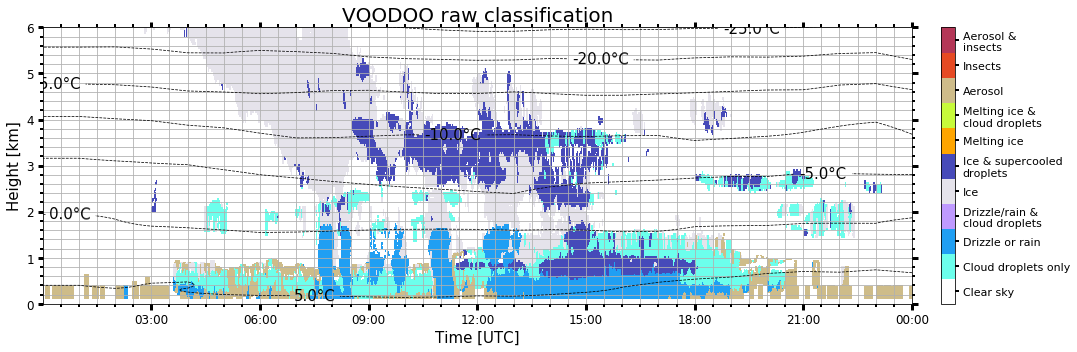

In [12]:
#fig_p, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
#font_settings.update({'fig': fig_p, 'colormap': 'coolwarm', 'zlim': [0.0, 1.0]})

#fig_p, ax[0,0] = lardaTR.plot_timeheight(P_ice, title='P(ice)', ax=ax[0, 0], **font_settings)
#fig_p, ax[1,0] = lardaTR.plot_timeheight(P_precip, title='P(precip)', ax=ax[1, 0], **font_settings)
#fig_p, ax[2,0] = lardaTR.plot_timeheight(P_allPR, title='P(ice+precip)', ax=ax[2, 0], **font_settings)

#fig_p, ax[0,1] = lardaTR.plot_timeheight(P_mixed, title='P(mixed)', ax=ax[0, 1], **font_settings)
#fig_p, ax[1,1] = lardaTR.plot_timeheight(P_droplets, title='P(droplets)', ax=ax[1, 1], **font_settings)
#fig_p, ax[2,1] = lardaTR.plot_timeheight(P_allCD, title='P(droplets+mixed)', ax=ax[2, 1], **font_settings)

#for i in range(3):
#    for j in range(2):
#        ax[i, j].grid(which='both', linestyle='')
#        if j > 0: ax[i, j].set_ylabel('')
#        if i < 2: ax[i, j].set_xlabel('')
#        
#plt.tight_layout(h_pad=0.1, w_pad=0.1)
#fig_p.suptitle('smoothed VOODOO classification and probabilities', y=1.025, fontsize=25)
#fig_p.savefig(f'plots/{case}-VOODOO_classes_raw-probabilities.png', dpi=450)

# plot smoothed data
smoothed_probs = np.zeros(voodoo_xr.voodoo_classification_probabilities.shape)
for i in range(9):
    smoothed_probs[:, :, i] = gaussian_filter(voodoo_xr.voodoo_classification_probabilities[:, :, i].values, sigma=_SMOOTH['sigma'])

voodoo_xr.voodoo_classification.values = np.argmax(smoothed_probs, axis=2)
voodoo_xr['voodoo_classification_post'] = utl.postprocessor(voodoo_xr)

font_settings.update({'colormap': 'cloudnet_target_new', 'zlim': [0, 10], 'save': False})
_, _ = _plot_classificaiton(voodoo_xr, 'voodoo_classification', title='VOODOO raw classification', **font_settings)

##  Cloudnetpy Target Classification & VOODOO post processed classification

In [13]:
#font_settings.update({'colormap': 'cloudnet_target_new', 'zlim': [0, 10], 'mask': voodoo_xr.mask_nc.values, 'save': False})

#_, _ = _plot_classificaiton(voodoo_xr, 'voodoo_classification', title='VOODOO raw classification', **font_settings)
#_, _ = _plot_classificaiton(voodoo_xr, 'target_classification', title='COUDNETpy classification', **font_settings)
#_, _ = _plot_classificaiton(voodoo_xr, 'voodoo_classification_post', title='VOODOO post-processed classification', **font_settings)


In [14]:
Z = utl.one_hot_to_spectra(voodoo_xr.features.values, voodoo_xr.mask.values)
voodoo_xr['ZSpec'] = (('ts', 'rg', 'nvelocity', 'nchannels'), Z)

((2882, 292), 6)


# Load a random batch of N\*N samples

In [15]:
# choose a random set of indices            
analyse_classes = [1, 2, 4, 5]
N = len(analyse_classes) 
indices = np.concatenate([utl.random_choice(voodoo_xr, font_settings['range_interval'][1], N=N, iclass=i, var='voodoo_class_raw_nosmoothing') for i in analyse_classes], axis=0)

hour_shift = 2 if dt_list[0] > datetime.datetime(2019, 4, 1) else 1
dots_ts = list(itemgetter(*indices[:, 0])(dt_list))
for it in range(N*N):
    dots_ts[it] -= datetime.timedelta(seconds=hour_shift*3600.)

In [16]:

#font_settings.update({'colormap': 'cloudnet_target_new', 'mask': voodoo_xr.mask_nc.values, 'save': False})
#fig, ax = _plot_classificaiton(voodoo_xr, 'voodoo_class_raw_nosmoothing', title='VOODOO raw classification non-smoothed', **font_settings)
#ax.scatter(dots_ts, voodoo_xr.voodoo_classification_post.rg.values[indices[:, 1]]/1000., s=75, c='r', edgecolors='white')
#for i in range(N*N):
#    sign = 1.0 if (i % 2) == 0 else -1.0
#    x, y = dots_ts[i], voodoo_xr['voodoo_classification'].rg.values[indices[i, 1]]/1000.
#    ax.annotate(
#        f'{i}', fontsize=25,
#        xy=(x, y), xytext=(x - datetime.timedelta(seconds=900.), y-0.7),  #sign*np.random.normal(loc=0, scale=1, size=1)),
#        arrowprops=dict(facecolor='black', width=0.0, headwidth=0.0),
#        )

#    
#fig, ax = plt.subplots(nrows=N, ncols=N, figsize=(21, 21))
#font_settings.update({'fig': fig})

#icnt = 0
#for i,j in product(range(N), range(N)):
#    ts = voodoo_xr.ZSpec.ts.values[indices[icnt, 0]]
#    dt2 = datetime.datetime.utcfromtimestamp(ts)
#    rg = voodoo_xr.ZSpec.rg.values[indices[icnt, 1]]

#    fig, ax[i, j] = plot_single_spectrogram(voodoo_xr.ZSpec, ts, rg, ax=ax[i, j], **font_settings)

#    load_xy_style(ax[i, j], xlabel='Doppler velocity bins [-]', ylabel='signal normalized')
#    ax[i, j].set_title(f'({icnt}) {dt2:%H:%M:%S} at {rg:6.3f} [m]', fontsize=12)
#    if j > 0: ax[i, j].set_ylabel('')
#    if i < N-1: ax[i, j].set_xlabel('')

#    pICE = voodoo_xr['voodoo_classification_probabilities'][indices[icnt, 0], indices[icnt, 1], 4].values
#    pPRECIP = voodoo_xr['voodoo_classification_probabilities'][indices[icnt, 0], indices[icnt, 1], 2].values
#    pMIXED = voodoo_xr['voodoo_classification_probabilities'][indices[icnt, 0], indices[icnt, 1], 5].values
#    pDROPS = voodoo_xr['voodoo_classification_probabilities'][indices[icnt, 0], indices[icnt, 1], 2].values
#    pOTHER = P_others_raw[indices[icnt, 0], indices[icnt, 1]].values
#    CN_class = voodoo_xr.target_classification.values[indices[icnt, 0], indices[icnt, 1]].astype(np.int)
#    VD_class = voodoo_xr.voodoo_class_raw_nosmoothing.values[indices[icnt, 0], indices[icnt, 1]].astype(np.int)
#    
#    ax[i, j].text(5, 0.95, f'P(MXD=5) = {pMIXED:.3f}',  fontdict=None)
#    ax[i, j].text(5, 0.895, f'P(ICE=4) = {pICE:.3f}',    fontdict=None)
#    ax[i, j].text(5, 0.84, f'P(PRC=2) = {pPRECIP:.2f}', fontdict=None)
#    ax[i, j].text(5, 0.785, f'P(DRP=1) = {pDROPS:.2f}',  fontdict=None)
#    ax[i, j].text(5, 0.73, f'P(OTH>5) = {pOTHER:.3f}',  fontdict=None)
#    ax[i, j].text(155, 0.95, f'cloudnet = {CN_class}',  fontdict=None)
#    ax[i, j].text(155, 0.895, f'voodoo = {VD_class}',  fontdict=None)
#    icnt +=1

##        
##fig.tight_layout(h_pad=0.02, w_pad=0.02)
#fig.savefig(f'plots/{case}-VOODOO_features-probabilities-classification.png', dpi=450)
#print(f'PUNTA AREAS {dt_list[0]:%A %d. %B %Y}')

# Look at range and time spectrograms

VOODOO Target Classification Distribution - raw
      841544   total
      653224   Clear sky
       18547   Cloud liquid droplets only
       20450   Drizzle or rain.
           0   Drizzle/rain & cloud droplet
      121098   Ice particles.
       27068   Ice coexisting with supercooled liquid droplets.
           0   Melting ice particles
           0   Melting ice & cloud droplets
        1157   Aerosol
           0   Insects
           0   Aerosol and Insects
VOODOO Target Classification Distribution - processed
      841544   total
      653224   Clear sky
       12043   Cloud liquid droplets only
       15315   Drizzle or rain.
       15733   Drizzle/rain & cloud droplet
      119566   Ice particles.
       20284   Ice coexisting with supercooled liquid droplets.
         763   Melting ice particles
         492   Melting ice & cloud droplets
        1790   Aerosol
        1112   Insects
        1222   Aerosol and Insects
CLOUDNETpy Target Classification Distribution
      841544

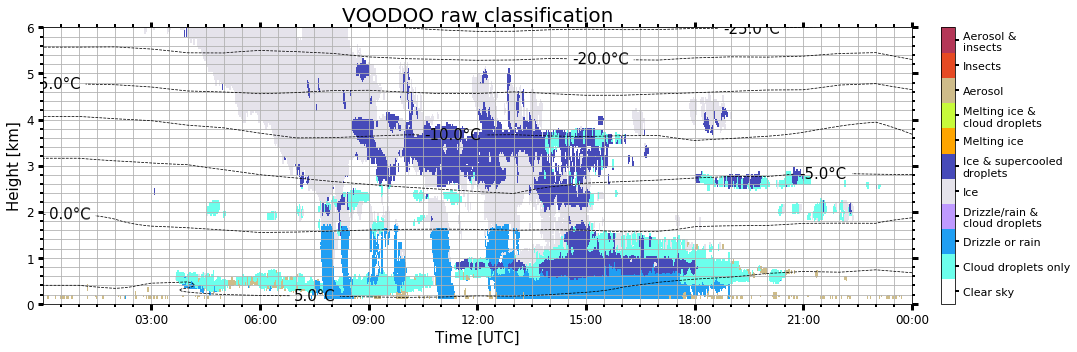

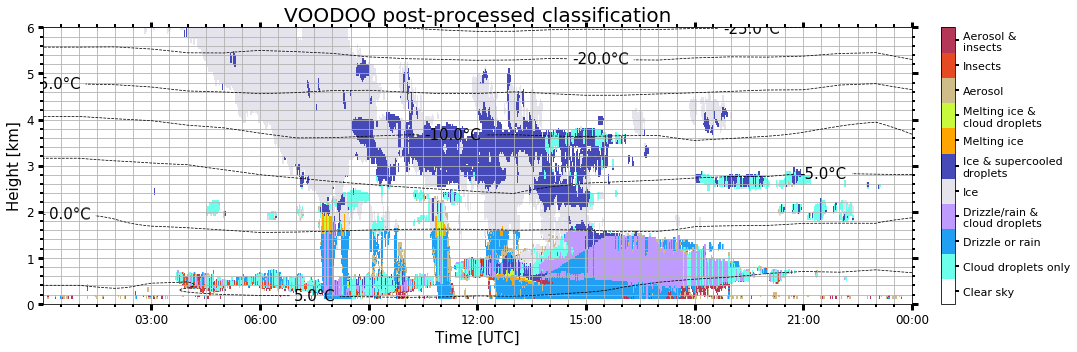

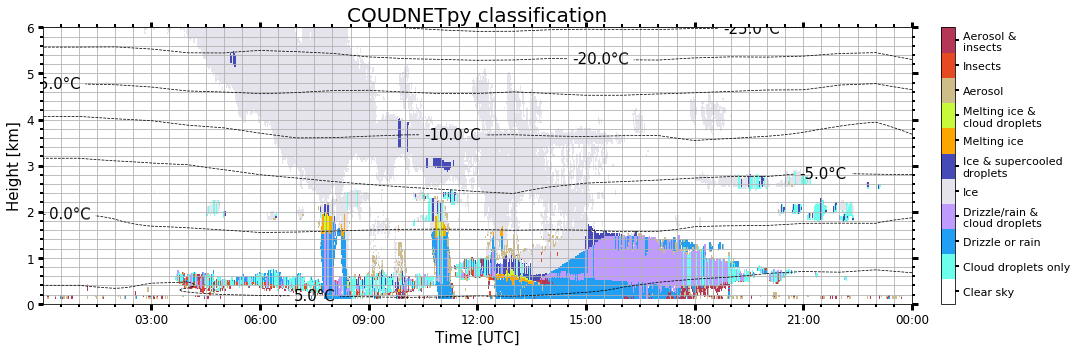

In [17]:
masked_vclass0 = voodoo_xr.voodoo_classification.values.copy()
masked_vclass0[mask0] = 0
masked_vclass1 = voodoo_xr.voodoo_classification_post.values.copy()
masked_vclass1[mask0] = 0
masked_cclass0 = voodoo_xr.target_classification.values.copy()
masked_cclass0[mask0] = 0
class_distr_voodoo_raw = utl.log_number_of_classes(masked_vclass0, text='VOODOO Target Classification Distribution - raw') 
class_distr_voodoo_post = utl.log_number_of_classes(masked_vclass1, text='VOODOO Target Classification Distribution - processed') 
class_distr_cloudnet = utl.log_number_of_classes(masked_cclass0, text='CLOUDNETpy Target Classification Distribution') 
font_settings.update({'colormap': 'cloudnet_target_new', 'zlim': [0, 10], 'mask': mask0})

_, _ = _plot_classificaiton(voodoo_xr, 'voodoo_classification', title='VOODOO raw classification', **font_settings)
_, _ = _plot_classificaiton(voodoo_xr, 'voodoo_classification_post', title='VOODOO post-processed classification', **font_settings)
_, _ = _plot_classificaiton(voodoo_xr, 'target_classification', title='COUDNETpy classification', **font_settings)

In [18]:
#ub=6
#fig, ax = plt.subplots(nrows=2, figsize=(17, 8))
#X = np.arange(11)
##for i in range():
#def _plot_bars(i):
#    ax[i].bar(X[1:ub] + 5.00, class_distr_voodoo_raw[1:ub], color='black', width=0.25, label='VOODOO raw', alpha=0.75)
#    ax[i].bar(X[1:ub] + 5.25, class_distr_voodoo_post[1:ub], color='royalblue', width=0.25, label='VOODOO post', alpha=0.75)
#    ax[i].bar(X[1:ub] + 5.50, class_distr_cloudnet[1:ub], color='orange', width=0.25, label='Cloudnetpy', alpha=0.75)
#    load_xy_style(ax[i], xlabel='', ylabel='number of samples$')
#    ax[i].set_xticks(X[1:ub]+5.25)
#    ax[i].set_xticklabels([])
#    ax[i].grid(which='both', linestyle=':', color='k', alpha=0.9)
#    
#_plot_bars(0)
#_plot_bars(1)

#ax[0].legend(loc='upper right', bbox_to_anchor=(.5, 0., 0.5, 1.0), fontsize=15)
#ax[0].set_title('Target Classification Distribution', fontsize=15)        
#ax[1].set_yscale('log')
#ax[1].set_xticklabels(Colormaps.target_names[1:ub], rotation = 0)
#fig.tight_layout()
#fig.savefig(f'plots/{case}-Bar-Chart-Class-Distributions-all-classificatiers.png', dpi=450)

In [19]:
#textprops = {'fontsize': 14, 'color': 'white', 'weight': 'bold'}
#kwargs = {
##    'labels': Colormaps.target_names[1:ub],
#    'autopct': '%1.1f%%', 
#    'colors': Colormaps.cloudnet_colors[1:ub], 
#    'textprops': textprops, 
#    'shadow': False, 
#    'labeldistance': 1.5, 
#    'radius': 2.4,
#    'pctdistance': 1.2
#}

#fig, ax = plt.subplots(ncols=3, figsize=(15, 15))
#_, _, _ = ax[0].pie(class_distr_voodoo_raw[1:ub], **kwargs)
#_, _, _ = ax[1].pie(class_distr_voodoo_post[1:ub], **kwargs)
#wedges, texts, autotexts = ax[2].pie(class_distr_cloudnet[1:ub], **kwargs)
#classification = ['VOODOO\nraw', 'VOODOO\npost', 'Cloudnetpy']
#for i in range(3):
#    ax[i].set_title(classification[i], fontsize=font_settings['font_size'], fontweight='bold')

#ax[2].legend(wedges, Colormaps.target_names[1:ub], fontsize=17, loc="right", bbox_to_anchor=(3.2, 0, 0.5, 1))

#plt.setp(autotexts, size=15, weight="bold")
#plt.subplots_adjust(wspace=1.75)
#fig.savefig(f'plots/{case}-Pie-Chart-Class-Distributions-all-classificatiers.png', dpi=450)

In [20]:
#plot_time_spectrogram(voodoo_xr.ZSpec, 3500., **font_settings)

In [21]:
#plot_range_spectrogram(voodoo_xr.ZSpec, datetime.datetime(YYYY, MM, DD, 14, 20, 5), **font_settings)

In [22]:
training_mask = utl.load_training_mask(voodoo_xr.target_classification.values, voodoo_xr.detection_status.values, 'CLOUDNETpy94')

targets = utl.classes_to_one_hot(voodoo_xr.target_classification.values, training_mask)
pred = utl.classes_to_one_hot(voodoo_xr.voodoo_classification.values, training_mask)

In [23]:
print(np.min(voodoo_xr.target_classification.values), np.max(voodoo_xr.target_classification.values))
print(np.min(voodoo_xr.voodoo_classification.values), np.max(voodoo_xr.voodoo_classification.values))

print(voodoo_xr.target_classification.shape, voodoo_xr.target_classification.shape)

0 10
0 8
(2882, 292) (2882, 292)


In [29]:
import pandas as pd
y_actu = pd.Series(targets[targets>0], name='Actual')
y_pred = pd.Series(pred[pred>0], name='Predicted')
df_conf = pd.crosstab(y_actu, y_pred)
df_conf_norm = df_conf / df_conf.sum(axis=1)

(7, 8)


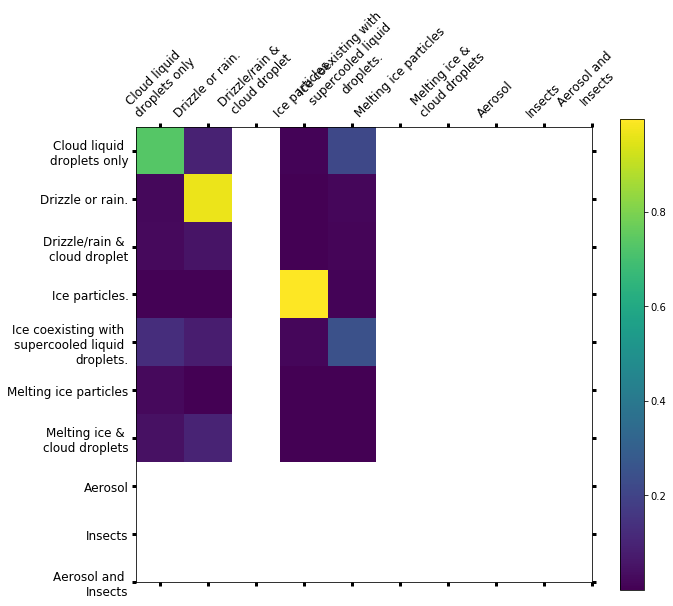

In [64]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

    df_confusion.mask(df_confusion > 1.0)
    mat = ax.imshow(df_confusion, cmap='viridis')#, norm=matplotlib.colors.LogNorm(vmin=1.0e-2, vmax=1)) # imshow
    #ax.title(title)
    cbar = fig.colorbar(mat, shrink=0.75)

    # We want to show all ticks...
    names = Colormaps.target_names[1:]
    ax.set_xticks(np.arange(len(names)))
    ax.set_yticks(np.arange(len(names)))
    
    # ... and label them with the respective list entries
    ax.set_xticklabels(names, rotation=45)
    ax.set_yticklabels(names)
    
    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=True,
                   labeltop=True, labelbottom=False)
    
    load_xy_style(ax, xlabel='', ylabel='')

    fig.tight_layout()
    
    return fig, ax

plot_confusion_matrix(df_conf_norm)
print(df_conf_norm.shape)
